In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import pandas as pd
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go


### so that u dont have warnings
from warnings import filterwarnings
filterwarnings('ignore')

#### Columns description

1. url contains the url of the restaurant in the zomato website

2. address contains the address of the restaurant in Bengaluru

3. name contains the name of the restaurant

4. online_order whether online ordering is available in the restaurant or not

5. book_table table book option available or not

6. rate contains the overall rating of the restaurant out of 5

7. votes contains total number of rating for the restaurant as of the above mentioned date

8. phone contains the phone number of the restaurant

9. location contains the neighborhood in which the restaurant is located

10. rest_type restaurant type

11. dish_liked dishes people liked in the restaurant

12. cuisines food styles, separated by comma

13. approx_cost(for two people) contains the approximate cost for meal for two people

14. reviews_list list of tuples containing reviews for the restaurant, each tuple

15. menu_item contains list of menus available in the restaurant

16. listed_in(type) type of meal

17. listed_in(city) contains the neighborhood in which the restaurant is listed

In [3]:
# very first u have to create a SQL connection to our SQLite database
con = sqlite3.connect(r"/content/drive/MyDrive/zomato/zomato_rawdata.sqlite")
#### check online its table name on https://sqliteonline.com/
pd.read_sql_query("SELECT * FROM Users" , con).head(2)

index                                                url  \
0      0  https://www.zomato.com/bangalore/jalsa-banasha...   
1      1  https://www.zomato.com/bangalore/spice-elephan...   

                                             address            name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...           Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...  Spice Elephant   

  online_order book_table   rate  votes                           phone  \
0          Yes        Yes  4.1/5    775  080 42297555\r\n+91 9743772233   
1          Yes         No  4.1/5    787                    080 41714161   

       location      rest_type  \
0  Banashankari  Casual Dining   
1  Banashankari  Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   

                         cuisines approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                         800   
1     Chinese, North Indian, Thai                         800   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari

In [4]:
df = pd.read_sql_query("SELECT * FROM Users" , con)

In [5]:
df.shape

(51717, 18)

In [6]:
df.dtypes

index                           int64
url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

In [7]:
len(df['name'].unique())

8792

In [8]:
df.isna().sum()

index                              0
url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [9]:
df.columns

Index(['index', 'url', 'address', 'name', 'online_order', 'book_table', 'rate',
       'votes', 'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

#### getting all NAN features

In [10]:
df.isnull().sum()

index                              0
url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [11]:
#% of missing values
df.isnull().sum()/len(df)*100

index                           0.000000
url                             0.000000
address                         0.000000
name                            0.000000
online_order                    0.000000
book_table                      0.000000
rate                           15.033741
votes                           0.000000
phone                           2.335789
location                        0.040606
rest_type                       0.438927
dish_liked                     54.291626
cuisines                        0.087012
approx_cost(for two people)     0.669026
reviews_list                    0.000000
menu_item                       0.000000
listed_in(type)                 0.000000
listed_in(city)                 0.000000
dtype: float64

It appears that a significant amount of data (around 50%) will be lost if we choose to remove the NaN values in the "dish_liked" column. Therefore, it would be advisable to retain this column for further analysis.

Another important feature to consider is the "rate" column, which contains approximately 15% null values. Given the importance of this feature, it is crucial to determine how to handle these missing values in order to obtain accurate insights from the dataset.

In [12]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', None, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

The column contains "NEW" and "-" values, which need to be replaced with either 0 or NaN after consulting with domain experts.

The column contains values in the format "3.8/5" instead of a single number, so we need to clean this data to get the correct ratings.

so lets replace 'NEW' & '-' with np.nan or with "missing value" ,so that we can fill later it with some value..

In [13]:
df['rate'].replace(('NEW' , '-') , np.nan , inplace=True)

In [14]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', nan, '2.9/5', '3.5/5', None, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

we need rating as 4.1 not as '4.1/5' , ie we need to fix it ..

In [15]:
df['rate'] = df['rate'].apply(lambda x : float(x.split('/')[0]) if type(x)==str else x)

In [16]:
df.head()

index                                                url  \
0      0  https://www.zomato.com/bangalore/jalsa-banasha...   
1      1  https://www.zomato.com/bangalore/spice-elephan...   
2      2  https://www.zomato.com/SanchurroBangalore?cont...   
3      3  https://www.zomato.com/bangalore/addhuri-udupi...   
4      4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table  rate  votes                             phone  \
0          Yes        Yes   4.1    775    080 42297555\r\n+91 9743772233   
1          Yes         No   4.1    787                      080 41714161   
2          Yes         No   3.8    918                    +91 9663487993   
3           No         No   3.7     88                    +91 9620009302   
4           No         No   3.8    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                         800   
1     Chinese, North Indian, Thai                         800   
2          Cafe, Mexican, Italian                         800   
3      South Indian, North Indian                         300   
4        North Indian, Rajasthani                         600   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
2          Buffet    Banashankari  
3          Buffet    Banashankari  
4          Buffet    Banashankari

In [17]:
df['rate'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, nan, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2,
       2.3, 4.8, 4.9, 2.1, 2. , 1.8])

### calculate avg rating of each resturant

In [18]:
data = df.groupby('name')['rate'].mean().nlargest(20)
fig = go.Figure(data=go.Bar(x=data.index, y=data))

fig.update_layout(title='Top 20 Restaurants by Average Rating',
                  xaxis_title='Restaurant Name', 
                  yaxis_title='Average Rating',
                  height=800)
fig.show()


In [19]:
df_rate=df.groupby('name')['rate'].mean().to_frame()
df_rate=df_rate.reset_index()
df_rate.columns=['restaurant','rating']
df_rate.head(20)

restaurant    rating
0                           #FeelTheROLL  3.400000
1                             #L-81 Cafe  3.900000
2                          #Vibes Restro       NaN
3                                #refuel  3.700000
4                 'Brahmins' Thatte Idli       NaN
5                            1 Fahreheit       NaN
6                               1000 B.C  3.200000
7   100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C  3.700000
8             11 to 11 Express Biriyanis  3.500000
9                     1131 Bar + Kitchen  4.500000
10             12th Main - Grand Mercure  4.100000
11                         1441 Pizzeria  4.100000
12                        1522 - The Pub  4.212000
13                    154 Breakfast Club  4.000000
14                     1722 Urban Bistro  4.100000
15                          18+ Ice Cafe  3.500000
16                                  1947  4.021429
17                      1980s Games Cafe  3.400000
18                    1992 Chats - Space  3.700000
19                                   1Q1  4.300000

In [20]:
df_rate.shape

(8792, 2)

##### Rating distribution

In [21]:
sns.set_style(style='whitegrid')
sns.distplot(df_rate['rating'])

<Axes: xlabel='rating', ylabel='Density'>

##### Almost more than 50 percent of restaurants has rating between 3 and 4. Restaurants having rating more than 4.5 are very rare.

#### Which are the top restaurant chains in Bangaluru?

Text(0.5, 0, 'Number of outlets')

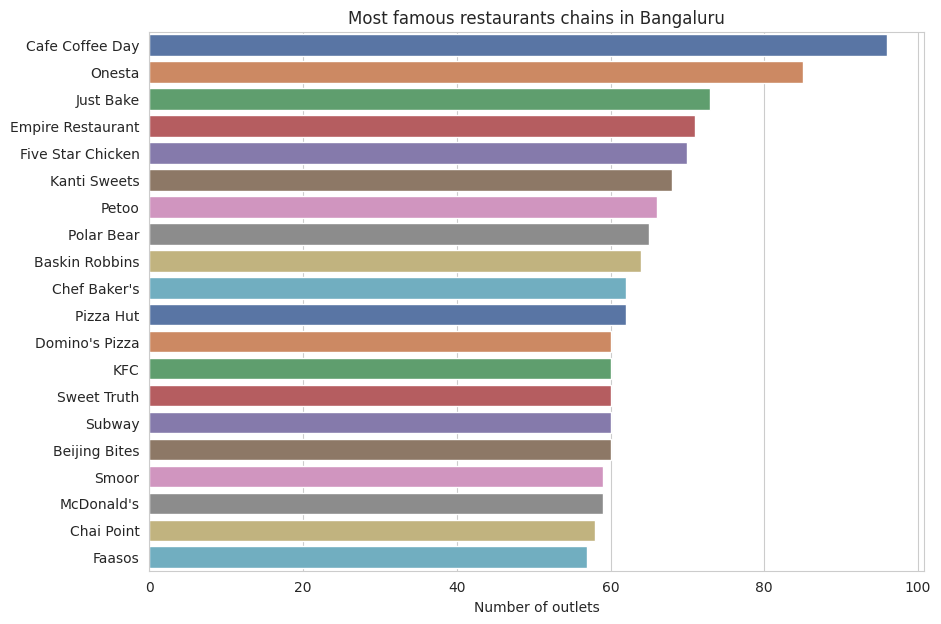

In [22]:
plt.figure(figsize=(10,7))
chains=df['name'].value_counts()[0:20]
sns.barplot(x=chains,y=chains.index,palette='deep')
plt.title("Most famous restaurants chains in Bangaluru")
plt.xlabel("Number of outlets") 

we are interested in investigating whether there is a correlation between a restaurant's rating and its online order option. In order to do this, we will create frequency tables to determine the number of restaurants that have a particular rating (e.g., 0, 1, 1.2, 1.4, 1.6) and whether they accept or do not accept online orders. By analyzing these frequency tables, we can identify any possible correlation between these variables.

##### How many of the restuarants do not accept online orders?

In [23]:
x=df['online_order'].value_counts()
labels=['accepted','not accepted']

In [24]:
fig = px.pie(df, values=x, names=labels,title='Pie chart')
fig.show()

In [25]:
x = pd.crosstab(df['rate'] , df['online_order'])

In [26]:
fig = px.bar(x, barmode='stack')  ## stacked=True gives basically stacked bar chart
fig.show()

Percentage distribution of retings of various restaurants after normalization

We need to normalize the values of the x dataframe across rows, for which we can use the x.div() function designed for the dataframe data structure in pandas. The axis=0 parameter ensures that the division is performed row-wise. We also need to convert the sum of each row to a floating-point number to ensure accurate division.

After normalization, we multiply each value by 100 to get results in percentage, which makes it easier to interpret the data. We can create a stacked bar chart with barmode='stack' to visualize the normalized data.

The resulting normalize_df dataframe can be used to create a stacked bar chart using Plotly's go.Bar() function. We can loop over the columns of normalize_df to create a trace for each column and pass them to data list. Finally, we can create the layout object with the barmode='stack' parameter and pass it to go.Figure() along with the data list to create the final plot.

In [27]:
x.sum(axis=1).astype(float)
normalize_df = x.div(x.sum(axis=1).astype(float) , axis=0)

data = [go.Bar(x=normalize_df.index, y=normalize_df[col]*100, name=col) for col in normalize_df.columns]

layout = go.Layout(barmode='stack')

fig = go.Figure(data=data, layout=layout)

fig.show()

#### What is the ratio b/w restaurants that provide and do not provide table booking ?

In [28]:
x = df['book_table'].value_counts()
labels = ['Do Not Allow Booking', 'Allow Booking']
colors = ['#ff9999', '#99ff99']
trace = go.Pie(labels=labels, values=x, hoverinfo='label+percent', 
               textinfo='value', textfont=dict(size=20),
               marker=dict(colors=colors, line=dict(color='#000000', width=2)),
               hole=0.5)
layout = go.Layout(title='Booking Table Distribution', height=500)
fig = go.Figure(data=[trace], layout=layout)
fig.show()


#### How many types of restaurants we have?

In [29]:
df['rest_type'].isna().sum()

227

In [30]:
df['rest_type'].dropna(inplace=True)

In [31]:
df['rest_type'].isna().sum()

227

In [32]:
len(df['rest_type'].unique())

94

In [33]:
rest_types = df['rest_type'].value_counts().nlargest(20)

data = [go.Bar(x=rest_types.index, y=rest_types.values, marker=dict(color='red'))]

layout = go.Layout(title='Top 20 Restaurant Types in Bangalore', xaxis=dict(title='Restaurant Type'), yaxis=dict(title='Count'))

fig = go.Figure(data=data, layout=layout)

fig.show()

##### At all, Banglore is known as the tech capital of India,people having busy and modern life will prefer Quick Bites.
##### We can observe tha Quick Bites type restaurants dominates.

#### highest voted restaurant

<Axes: xlabel='name'>

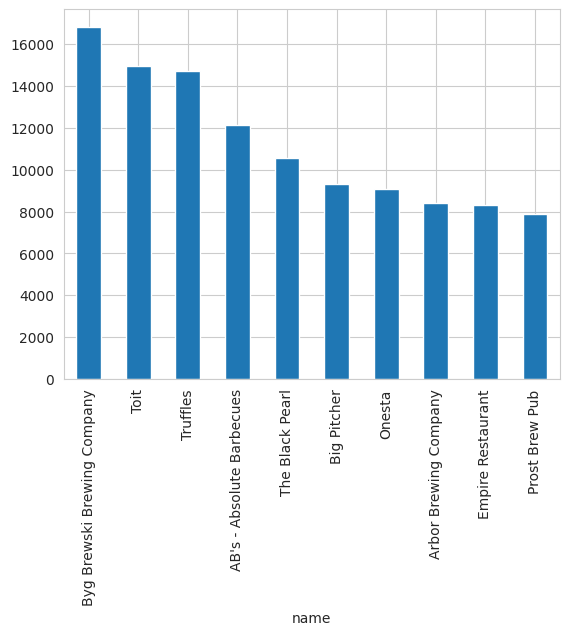

In [34]:
df.groupby('name')['votes'].max().nlargest(10).plot.bar()
    

### total restaurants at different locations of Bengalore

In [35]:
df.groupby('location')['name'].unique()

location
BTM                  [Sankranthi Veg Restaurant, Hearts Unlock Cafe...
Banashankari         [Jalsa, Spice Elephant, San Churro Cafe, Addhu...
Banaswadi            [Cafe Nibras, The Sanctuary, Crunch Pizzas, 9 ...
Bannerghatta Road    [Deja Vu Resto Bar, Fattoush, Empire Restauran...
Basavanagudi         [Grand Village, Timepass Dinner, Srinathji's C...
                                           ...                        
West Bangalore       [FreshMenu, Fit Dish Fetish, Garden City Mobil...
Whitefield           [Imperio Cafe, Night Diaries, LocalHost, AB's ...
Wilson Garden        [Tree Top, Sahana's (Nati Style), Karavali Kol...
Yelahanka            [Prashanth Naati Corner, Red Chillies Curries ...
Yeshwantpur          [Chef's Bank, New Agarwal Bhavan, Fishing Boat...
Name: name, Length: 93, dtype: object

In [36]:
restaurant=[]
location=[]
for key,location_df in df.groupby('location'):
    location.append(key)
    restaurant.append(len(location_df['name'].unique()))


In [37]:
df_total=pd.DataFrame(zip(location,restaurant))
df_total.columns=['location','restaurant']
df_total.set_index('location',inplace=True)
df_total.sort_values(by='restaurant').tail(10)

restaurant
location                     
Bellandur                 349
Jayanagar                 352
Bannerghatta Road         448
JP Nagar                  502
Indiranagar               526
Marathahalli              659
HSR                       684
Electronic City           696
BTM                       699
Whitefield                824

In [38]:
data = [go.Bar(x=df_total.sort_values(by='restaurant').tail(10).index,
               y=df_total.sort_values(by='restaurant').tail(10)['restaurant'],
               marker=dict(color='blue')
              )]

layout = go.Layout(title='Top 10 Areas with Highest Number of Outlets',
                   xaxis=dict(title='Restaurant'),
                   yaxis=dict(title='Number of Outlets'))

fig = go.Figure(data=data, layout=layout)

fig.show()


In [39]:
df.isnull().sum()

index                              0
url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                           10052
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

### different type of restaurants

In [40]:
#data is represented in form of percentage 
(df['rest_type'].value_counts()/len(df))*100

Quick Bites                   36.993638
Casual Dining                 19.974090
Cafe                           7.216196
Delivery                       5.035095
Dessert Parlor                 4.375737
                                ...    
Dessert Parlor, Kiosk          0.003867
Food Court, Beverage Shop      0.003867
Dessert Parlor, Food Court     0.003867
Sweet Shop, Dessert Parlor     0.001934
Quick Bites, Kiosk             0.001934
Name: rest_type, Length: 93, dtype: float64

### Total number of variety of restaurants ie north indian,south Indian

In [41]:
cuisines = df['cuisines'].value_counts()[:10]
fig = go.Figure(data=[go.Bar(x=cuisines, y=cuisines.index, orientation='h')])

fig.update_layout(title='Most popular cuisines of Bangalore', xaxis_title='Count')
fig.show()


### We can observe that North Indian,chinese,South Indian and Biriyani are most common.
### It means Bengalore is more influenced by North Indian culture more than South

### Analyse Approx cost for 2 people

In [42]:
len(df['approx_cost(for two people)'].value_counts())

70

In [43]:
df['approx_cost(for two people)'].isna().sum()

346

In [44]:
df.dropna(axis='index',subset=['approx_cost(for two people)'],inplace=True)

In [45]:
df['approx_cost(for two people)'].isna().sum()

0

In [46]:
df['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [47]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [48]:
df[~df['approx_cost(for two people)'].apply(is_float)]

index                                                url  \
67        67  https://www.zomato.com/gustoesbeerhouse?contex...   
119      119  https://www.zomato.com/bangalore/k27-the-pub-b...   
166      166  https://www.zomato.com/bangalore/patio-805-jay...   
207      207  https://www.zomato.com/bangalore/chutney-chang...   
217      217  https://www.zomato.com/bangalore/toscano-jayan...   
...      ...                                                ...   
51708  51708  https://www.zomato.com/bangalore/keys-cafe-key...   
51712  51712  https://www.zomato.com/bangalore/best-brews-fo...   
51714  51714  https://www.zomato.com/bangalore/plunge-sherat...   
51715  51715  https://www.zomato.com/bangalore/chime-sherato...   
51716  51716  https://www.zomato.com/bangalore/the-nest-the-...   

                                                 address  \
67     10, 30th Main, Deve Gowda Petrol Bunk Road, 3r...   
119    27, 27th Cross, 2nd Stage, Banashankari, Banga...   
166    805, Ground Floor, 35C Cross, 9th Main, 4th Bl...   
207    Cosmopolitan Club, 22nd Cross, 3rd Block, Jaya...   
217    359/38,Next to Fabindia, 7th Cross, 1st Block,...   
...                                                  ...   
51708  Keys Hotel, 6, 1st Phase Industrial Area, Near...   
51712  Four Points by Sheraton Bengaluru, 43/3, White...   
51714  Sheraton Grand Bengaluru Whitefield Hotel & Co...   
51715  Sheraton Grand Bengaluru Whitefield Hotel & Co...   
51716  ITPL Main Road, KIADB Export Promotion Industr...   

                                                    name online_order  \
67                                    Gustoes Beer House           No   
119                                        K27 - The Pub           No   
166                                            Patio 805          Yes   
207                                        Chutney Chang          Yes   
217                                              Toscano          Yes   
...                                                  ...          ...   
51708                             Keys Cafe - Keys Hotel           No   
51712  Best Brews - Four Points by Sheraton Bengaluru...           No   
51714  Plunge - Sheraton Grand Bengaluru Whitefield H...           No   
51715  Chime - Sheraton Grand Bengaluru Whitefield Ho...           No   
51716                       The Nest - The Den Bengaluru           No   

      book_table  rate  votes                           phone  \
67            No   4.1    868                    080 49653521   
119           No   3.1     30                  +91 9980097472   
166          Yes   4.1    364                  +91 8884999805   
207          Yes   4.1   2339  080 22443007\r\n+91 9901967373   
217          Yes   4.3   1129  080 41558423\r\n+91 7619320074   
...          ...   ...    ...                             ...   
51708         No   2.8    161    080 39451000\n+91 8884038484   
51712         No   3.6     27                    080 40301477   
51714         No   NaN      0                            None   
51715        Yes   4.3    236                    080 49652769   
51716         No   3.4     13                  +91 8071117272   

                         location           rest_type  \
67                   Banashankari                 Pub   
119                  Banashankari                 Bar   
166                     Jayanagar       Casual Dining   
207                     Jayanagar       Casual Dining   
217                     Jayanagar       Casual Dining   
...                           ...                 ...   
51708                  Whitefield  Casual Dining, Bar   
51712                  Whitefield                 Bar   
51714                  Whitefield                 Bar   
51715  ITPL Main Road, Whitefield                 Bar   
51716  ITPL Main Road, Whitefield  Bar, Casual Dining   

                                              dish_liked  \
67     Beer, Wedges, Pizza, Nachos, Salads, Papaya Sa...   
119               

In [49]:
df['approx_cost(for two people)'].dtype

dtype('O')

In [50]:
df['approx_cost(for two people)']

0          800
1          800
2          800
3          300
4          600
         ...  
51712    1,500
51713      600
51714    2,000
51715    2,500
51716    1,500
Name: approx_cost(for two people), Length: 51371, dtype: object

In [51]:
type(df['approx_cost(for two people)'][0])

str

#### remove ,

In [52]:
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].apply(lambda x: x.replace(',',''))

In [53]:
df['approx_cost(for two people)']=df['approx_cost(for two people)'].astype(int)

##### cost vs rating

In [54]:
fig = px.scatter(df, x='rate', y='approx_cost(for two people)', color='online_order',
                 labels={'rate': 'Rating', 'approx_cost(for two people)': 'Approximate Cost for Two'},
                 title='Relationship Between Rating and Approximate Cost for Two with Online Order Option')

fig.show()


##### from this scattterplot,we can come up with a conclusion ya most of the highest rated accepts online order and they r budgeted too

In [55]:
df.head()

index                                                url  \
0      0  https://www.zomato.com/bangalore/jalsa-banasha...   
1      1  https://www.zomato.com/bangalore/spice-elephan...   
2      2  https://www.zomato.com/SanchurroBangalore?cont...   
3      3  https://www.zomato.com/bangalore/addhuri-udupi...   
4      4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table  rate  votes                             phone  \
0          Yes        Yes   4.1    775    080 42297555\r\n+91 9743772233   
1          Yes         No   4.1    787                      080 41714161   
2          Yes         No   3.8    918                    +91 9663487993   
3           No         No   3.7     88                    +91 9620009302   
4           No         No   3.8    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines  approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                          800   
1     Chinese, North Indian, Thai                          800   
2          Cafe, Mexican, Italian                          800   
3      South Indian, North Indian                          300   
4        North Indian, Rajasthani                          600   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
2          Buffet    Banashankari  
3          Buffet    Banashankari  
4          Buffet    Banashankari

### Is there any difference b/w votes of restaurants accepting and not accepting online orders?

In [56]:
sns.boxplot(x='online_order',y='votes',data=df)

<Axes: xlabel='online_order', ylabel='votes'>

#### from this boxplot,we can observe that median number of votes for both categories vary.
#### Restaurants accepting online orders get more votes from customers as there is a rating option poping up after each order through zomato application.

#### Is there any difference b/w price of restaurants accepting and not accepting online orders?

In [57]:
fig = px.box(df,x='online_order',y='approx_cost(for two people)')
fig.show()

#### Restaurants accepting online orders are more affordable than Restaurants who are accepting online orders

### Cheapest Rate for 2 people

In [58]:
df['approx_cost(for two people)'].min()

40

### Most costly for 2 people

In [59]:
df['approx_cost(for two people)'].max()

6000

In [60]:
df[df['approx_cost(for two people)']==6000]

index                                                url  \
19139  19139  https://www.zomato.com/bangalore/le-cirque-sig...   
45618  45618  https://www.zomato.com/bangalore/le-cirque-sig...   

                                                 address  \
19139  The Leela Palace, 23, Old Airport Road, Bangalore   
45618  The Leela Palace, 23, Old Airport Road, Bangalore   

                                         name online_order book_table  rate  \
19139  Le Cirque Signature - The Leela Palace           No        Yes   4.3   
45618  Le Cirque Signature - The Leela Palace           No        Yes   4.3   

       votes                         phone          location    rest_type  \
19139    126  080 30571234\r\n080 30571540  Old Airport Road  Fine Dining   
45618    128    080 30571234\n080 30571540  Old Airport Road  Fine Dining   

                                              dish_liked         cuisines  \
19139  Wine, Asparagus Soup, Creme Brulee, Pasta, Rav...  French, Italian   
45618  Wine, Asparagus Soup, Creme Brulee, Pasta, Rav...  French, Italian   

       approx_cost(for two people)  \
19139                         6000   
45618                         6000   

                                            reviews_list menu_item  \
19139  [('Rated 5.0', 'RATED\n  Awesome would be an u...        []   
45618  [('Rated 5.0', 'RATED\n  Awesome would be an u...        []   

      listed_in(type)   listed_in(city)  
19139        Dine-out       Indiranagar  
45618        Dine-out  Old Airport Road

In [61]:
df[df['approx_cost(for two people)']==6000]['name']

19139    Le Cirque Signature - The Leela Palace
45618    Le Cirque Signature - The Leela Palace
Name: name, dtype: object

##### distribution of cost for 2 people

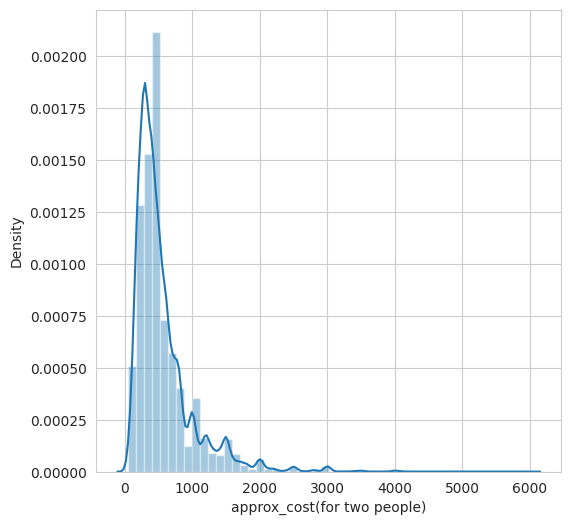

In [62]:
plt.figure(figsize=(6,6))
sns.distplot(df['approx_cost(for two people)'])
plt.show()

In [63]:
px.histogram(df, x="approx_cost(for two people)")

##### most of the price lies between in a range of under 1000,it means most are affordable & very few are luxurious

### Most costly Rate for 2 people is served at which Restaurant what exactly is the dish involved in this and liked dish of that restaurant

In [64]:
df[df['approx_cost(for two people)']==6000].loc[:,('name','cuisines','dish_liked')]

name         cuisines  \
19139  Le Cirque Signature - The Leela Palace  French, Italian   
45618  Le Cirque Signature - The Leela Palace  French, Italian   

                                              dish_liked  
19139  Wine, Asparagus Soup, Creme Brulee, Pasta, Rav...  
45618  Wine, Asparagus Soup, Creme Brulee, Pasta, Rav...

In [65]:
df[df['approx_cost(for two people)']==6000][['name','cuisines','dish_liked']]

name         cuisines  \
19139  Le Cirque Signature - The Leela Palace  French, Italian   
45618  Le Cirque Signature - The Leela Palace  French, Italian   

                                              dish_liked  
19139  Wine, Asparagus Soup, Creme Brulee, Pasta, Rav...  
45618  Wine, Asparagus Soup, Creme Brulee, Pasta, Rav...

In [79]:
data=df.copy()

In [80]:
data.dtypes

index                            int64
url                             object
address                         object
name                            object
online_order                    object
book_table                      object
rate                           float64
votes                            int64
phone                           object
location                        object
rest_type                       object
dish_liked                      object
cuisines                        object
approx_cost(for two people)      int64
reviews_list                    object
menu_item                       object
listed_in(type)                 object
listed_in(city)                 object
dtype: object

In [81]:
data.set_index('name',inplace=True)

### Top 10 Most Expensive restaurant with approx cost for 2 people

In [82]:
data['approx_cost(for two people)'].nlargest(10).plot.bar()

<Axes: xlabel='name'>

### Top 10 Cheapest restaurant with approx cost for 2 people

<Axes: xlabel='name'>

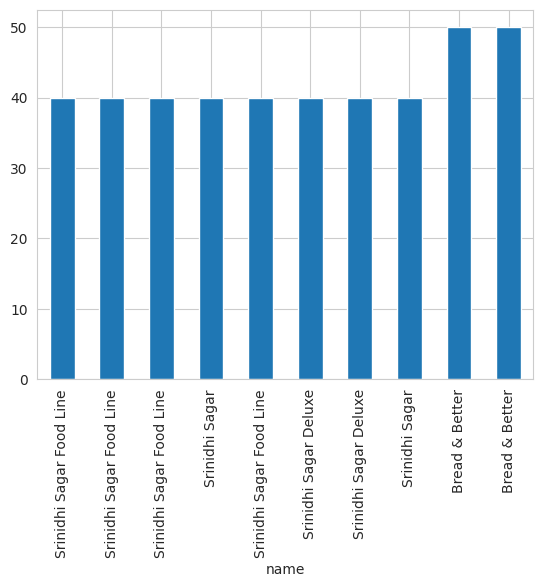

In [83]:
data['approx_cost(for two people)'].nsmallest(10).plot.bar()

### Top 10 Cheapest restaurant location wise with approx cost for 2 people 

In [84]:
data.set_index('location',inplace=True)


In [85]:
data.head()

index                                                url  \
location                                                                 
Banashankari      0  https://www.zomato.com/bangalore/jalsa-banasha...   
Banashankari      1  https://www.zomato.com/bangalore/spice-elephan...   
Banashankari      2  https://www.zomato.com/SanchurroBangalore?cont...   
Banashankari      3  https://www.zomato.com/bangalore/addhuri-udupi...   
Basavanagudi      4  https://www.zomato.com/bangalore/grand-village...   

                                                        address online_order  \
location                                                                       
Banashankari  942, 21st Main Road, 2nd Stage, Banashankari, ...          Yes   
Banashankari  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...          Yes   
Banashankari  1112, Next to KIMS Medical College, 17th Cross...          Yes   
Banashankari  1st Floor, Annakuteera, 3rd Stage, Banashankar...           No   
Basavanagudi  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...           No   

             book_table  rate  votes                             phone  \
location                                                                 
Banashankari        Yes   4.1    775    080 42297555\r\n+91 9743772233   
Banashankari         No   4.1    787                      080 41714161   
Banashankari         No   3.8    918                    +91 9663487993   
Banashankari         No   3.7     88                    +91 9620009302   
Basavanagudi         No   3.8    166  +91 8026612447\r\n+91 9901210005   

                        rest_type  \
location                            
Banashankari        Casual Dining   
Banashankari        Casual Dining   
Banashankari  Cafe, Casual Dining   
Banashankari          Quick Bites   
Basavanagudi        Casual Dining   

                                                     dish_liked  \
location                                                          
Banashankari  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
Banashankari  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
Banashankari  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
Banashankari                                        Masala Dosa   
Basavanagudi                                Panipuri, Gol Gappe   

                                    cuisines  approx_cost(for two people)  \
location                                                                    
Banashankari  North Indian, Mughlai, Chinese                          800   
Banashankari     Chinese, North Indian, Thai                          800   
Banashankari          Cafe, Mexican, Italian                          800   
Banashankari      South Indian, North Indian                          300   
Basavanagudi        North Indian, Rajasthani                          600   

                                                   reviews_list menu_item  \
location                                                                    
Banashankari  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
Banashankari  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
Banashankari  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
Banashankari  [('Rated 4.0', "RATED\n  Great food and proper...        []   
Basavanagudi  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

             listed_in(type) listed_in(city)  
location                                      
Banashankari          Buffet    Banashankari  
Banashankari          Buffet    Banashankari  
Banashankari          Buffet    Banashankari  
Banashankari          Buffet    Banashankari  
Basavanagudi          Buffet    Banashankari

### all the restautant that are below than 500(budget hotel)

In [87]:
data[data['approx_cost(for two people)']<=500]

index                                                url  \
location                                                                 
Banashankari      3  https://www.zomato.com/bangalore/addhuri-udupi...   
Banashankari     10  https://www.zomato.com/bangalore/caf%C3%A9-dow...   
Banashankari     12  https://www.zomato.com/bangalore/the-coffee-sh...   
Banashankari     13  https://www.zomato.com/bangalore/caf-eleven-ba...   
Banashankari     18  https://www.zomato.com/bangalore/t3h-cafe-bana...   
...             ...                                                ...   
KR Puram      51640  https://www.zomato.com/bangalore/punjabi-charc...   
Brookefield   51642  https://www.zomato.com/bangalore/basaveshwara-...   
Brookefield   51643  https://www.zomato.com/bangalore/new-ambur-bir...   
Brookefield   51644  https://www.zomato.com/bangalore/punjabi-thadk...   
Brookefield   51645  https://www.zomato.com/bangalore/raapchick-bro...   

                                                        address online_order  \
location                                                                       
Banashankari  1st Floor, Annakuteera, 3rd Stage, Banashankar...           No   
Banashankari  12,29 Near PES University Back Gate, D'Souza N...          Yes   
Banashankari      6th Block, 3rd Stage, Banashankari, Bangalore          Yes   
Banashankari  111, Sapphire Toys Building, 100 Feet Ring Roa...           No   
Banashankari  504, CJ Venkata Das Road, Padmanabhangar, 2nd ...           No   
...                                                         ...          ...   
KR Puram      7, Anurhh Arcade, Hoodi Road, Kodigehalli Road...           No   
Brookefield   Nanjudeshwari complex, Oppsite Brookefield Mal...           No   
Brookefield   AECS Layout, ITPL Main Road, Brookefield, Bang...           No   
Brookefield   7/3, ASK Tower, Kundanahalli Gate, Next to Bat...           No   
Brookefield   Opposite Brookefield Mall, Kundanhalli, Brooke...          Yes   

             book_table  rate  votes                           phone  \
location                                                               
Banashankari         No   3.7     88                  +91 9620009302   
Banashankari         No   4.1    402  080 26724489\r\n+91 7406048982   
Banashankari        Yes   4.2    164                  +91 9731644212   
Banashankari         No   4.0    424                    080 49577715   
Banashankari         No   3.9     93                  +91 8884726600   
...                 ...   ...    ...                             ...   
KR Puram             No   3.6     31  +91 9341341916\n+91 7619416499   
Brookefield          No   NaN      0  +91 9740912864\n+91 7353747430   
Brookefield          No   NaN      0                  +91 9443087893   
Brookefield          No   NaN      0  +91 7338330336\n+91 9591568221   
Brookefield          No   3.6     49    080 41717785\n+91 9571153004   

                rest_type                                         dish_liked  \
location                                                                       
Banashankari  Quick Bites                                        Masala Dosa   
Banashankari         Cafe  Waffles, Pasta, Crispy Chicken, Honey Chilli C...   
Banashankari         Cafe  Coffee, Spaghetti, Pancakes, Nachos, Pasta, Sa...   
Banashankari         Cafe  Sandwich, Omelette, Ice Tea, Virgin Mojito, Ho...   
Banashankari         Cafe     Cheese Maggi, Peri Peri Fries, Pasta Arrabiata   
...                   ...                                                ...   
KR Puram      Quick Bites                                               None   
Brookefield   Quick Bites                                               None   
Brookefield   Quick Bites                                               None   
Brookefield   Quick Bites                                               None   
Brookefield   Quick Bites                                            Burgers   

                                

In [88]:
df_budget=data[data['approx_cost(for two people)']<=500].loc[:,('approx_cost(for two people)')]
df_budget=df_budget.reset_index()
df_budget.head()

location  approx_cost(for two people)
0  Banashankari                          300
1  Banashankari                          500
2  Banashankari                          500
3  Banashankari                          450
4  Banashankari                          300

In [89]:
df_budget['approx_cost(for two people)'].value_counts().plot.bar()

<Axes: >

### we can conclude that 300 and 400 cost dishes are maximum in count

In [94]:
data_a = df_budget['approx_cost(for two people)'].value_counts()


fig = go.Figure(data=go.Bar(x=data_a.index, y=data_a))
fig.update_layout(title='Counts of Approximate Cost for Two People', xaxis=dict(title='Approximate Cost'), yaxis=dict(title='Count'))
fig.show()


### Restaurants that have better rating >4 and that are under budget too

In [95]:
df[(df['rate']>=4) & (df['approx_cost(for two people)']<=500)].shape


(4007, 18)

### Total no. of Restaurants that have better rating >4 and that are under budget too ie less than 500

In [96]:
df_new=df[(df['rate']>=4) & (df['approx_cost(for two people)']<=500)]
len(df_new['name'].unique())

628

### Total such various  affordable hotels at different location

In [97]:
location=[]
total=[]
for loc,location_df in df_new.groupby('location'):
    location.append(loc)
    total.append(len(location_df['name'].unique()))
    
    

In [98]:
len(location)

68

In [99]:
len(total)

68

In [100]:
location_df=pd.DataFrame(zip(location,total))
location_df.columns=['location','restaurant']
location_df.set_index('location',inplace=True)


In [101]:
location_df.head(20)

restaurant
location                      
BTM                         54
Banashankari                25
Banaswadi                    3
Bannerghatta Road           19
Basavanagudi                31
Basaveshwara Nagar           3
Bellandur                   20
Brigade Road                11
Brookefield                 16
Church Street                8
City Market                  1
Commercial Street            4
Cunningham Road              4
Domlur                       5
Ejipura                      1
Electronic City             23
Frazer Town                 15
HBR Layout                   3
HSR                         58
Hebbal                       1

In [102]:
type(location)

list

Text(0, 0.5, 'Total restaurants')

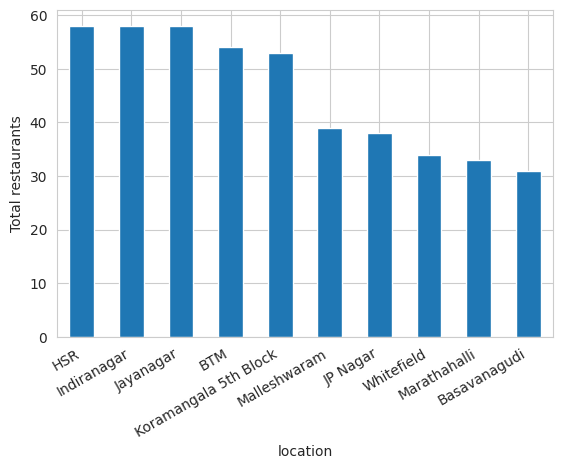

In [103]:

location_df['restaurant'].nlargest(10).plot.bar()
plt.gcf().autofmt_xdate()
plt.ylabel('Total restaurants')

# To Visualise what are the names of those hotels

In [104]:
location=[]
total=[]
for loc,location_df in df_new.groupby('location'):
    location.append(loc)
    total.append(location_df['name'].unique())
    

In [105]:
afford=pd.DataFrame(zip(location,total))
afford.columns=['location','res_names']
afford.set_index('location',inplace=True)
afford.head()

res_names
location                                                            
BTM                [eat.fit, Hiyar Majhe Kolkata, XO Belgian Waff...
Banashankari       [CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Down The ...
Banaswadi          [Pooja Dosa Camp, Corner House Ice Cream, The ...
Bannerghatta Road  [BOX8- Desi Meals, Krishna Kuteera, Krishna Ku...
Basavanagudi       [Kabab Magic, Sri Guru Kottureshwara Davangere...

### Finding Best budget Restaurants in any location

###### we will pass location and restaurant type as parameteres,function will return name of restaurants.

In [106]:
def return_budget(location,restaurant):
    budget=df[(df['approx_cost(for two people)']<=400) & (df['location']==location) & 
                     (df['rate']>4) & (df['rest_type']==restaurant)]
    return(budget['name'].unique())

In [107]:
return_budget('BTM',"Quick Bites")

array(['Swadista Aahar', 'Litti Twist', 'The Shawarma Shop', 'Gorbandh',
       'Yum In My Tum', 'Chaatimes', "Muthashy's", 'Swad Punjab Da',
       "Domino's Pizza", 'Roti Wala', 'Andhra Kitchen'], dtype=object)

### Which are the foodie areas?

In [109]:
Restaurant_locations = df['location'].value_counts()[:20]

data = go.Bar(x=Restaurant_locations.values, y=Restaurant_locations.index, orientation='h')

layout = go.Layout(title='Restaurant Locations', xaxis=dict(title='Count'), yaxis=dict(title='Location'))

fig = go.Figure(data=[data], layout=layout)
fig.show()

#### We can see that BTM,HSR and Koranmangala 5th block has the most number of restaurants.
#### BTM dominates the section by having more than 5000 restaurants.

### geographical analysis

#### I need Latitudes & longitudes for each of the place for geaographical Data analysis,so to fetch lat,lon of each place,use Geopy

In [ ]:
df.shape

(43690, 17)

In [ ]:
len(df['location'].unique())

92

In [ ]:
locations=pd.DataFrame({"Name":df['location'].unique()})

In [ ]:
locations['new_Name']='Bangalore '+locations['Name']

In [ ]:
locations.head()

Name                      new_Name
0        Banashankari        Bangalore Banashankari
1        Basavanagudi        Bangalore Basavanagudi
2         Mysore Road         Bangalore Mysore Road
3           Jayanagar           Bangalore Jayanagar
4  Kumaraswamy Layout  Bangalore Kumaraswamy Layout

In [ ]:
!pip install geopy

In [ ]:
from geopy.geocoders import Nominatim

In [ ]:
lat_lon=[]
geolocator=Nominatim(user_agent="app")
for location in locations['Name']:
    location = geolocator.geocode(location)
    if location is None:
        lat_lon.append(np.nan)
    else:    
        geo=(location.latitude,location.longitude)
        lat_lon.append(geo)

In [ ]:
locations['geo_loc']=lat_lon

In [ ]:
locations.head()

Name                      new_Name  \
0        Banashankari        Bangalore Banashankari   
1        Basavanagudi        Bangalore Basavanagudi   
2         Mysore Road         Bangalore Mysore Road   
3           Jayanagar           Bangalore Jayanagar   
4  Kumaraswamy Layout  Bangalore Kumaraswamy Layout   

                            geo_loc  
0          (15.8876779, 75.7046777)  
1          (13.8345913, 75.7339359)  
2          (51.4629324, -0.1601502)  
3  (27.64392675, 83.05280519687284)  
4          (12.9081487, 77.5553179)

In [ ]:
locations.to_csv('zomato_locations.csv',index=False)

##### We have found out latitude and longitude of each location listed in the dataset using geopy.
##### This is used to plot maps.

In [ ]:
Rest_locations=pd.DataFrame(df['location'].value_counts().reset_index())

In [ ]:
Rest_locations.columns=['Name','count']
Rest_locations.head()

Name  count
0                    BTM   4237
1  Koramangala 5th Block   2358
2                    HSR   2113
3            Indiranagar   1892
4               JP Nagar   1849

##### now combine both the dataframes

In [ ]:
locations.head()

Name                      new_Name  \
0        Banashankari        Bangalore Banashankari   
1        Basavanagudi        Bangalore Basavanagudi   
2         Mysore Road         Bangalore Mysore Road   
3           Jayanagar           Bangalore Jayanagar   
4  Kumaraswamy Layout  Bangalore Kumaraswamy Layout   

                            geo_loc  
0          (15.8876779, 75.7046777)  
1          (13.8345913, 75.7339359)  
2          (51.4629324, -0.1601502)  
3  (27.64392675, 83.05280519687284)  
4          (12.9081487, 77.5553179)

In [ ]:
locations.shape

(92, 3)

In [ ]:
Rest_locations.shape

(92, 2)

In [ ]:
Restaurant_locations=Rest_locations.merge(locations,on='Name',how="left").dropna()
Restaurant_locations.head()

Name  count                         new_Name  \
0                    BTM   4237                    Bangalore BTM   
1  Koramangala 5th Block   2358  Bangalore Koramangala 5th Block   
2                    HSR   2113                    Bangalore HSR   
3            Indiranagar   1892            Bangalore Indiranagar   
4               JP Nagar   1849               Bangalore JP Nagar   

                                   geo_loc  
0  (12.911275849999999, 77.60456543431182)  
1                 (13.2923988, 77.7519261)  
2                     (18.1475, 41.538889)  
3                 (12.9732913, 77.6404672)  
4                 (12.2655944, 76.6465404)

In [ ]:
Restaurant_locations.shape

(91, 4)

In [ ]:
Restaurant_locations['count'].max()

4237

In [ ]:
type(Restaurant_locations['geo_loc'][0])

tuple

In [ ]:
def generateBaseMap(default_location=[12.97, 77.59], default_zoom_start=12):
    base_map = folium.Map(location=default_location, zoom_start=default_zoom_start)
    return base_map

In [ ]:
len(Restaurant_locations['geo_loc'])

91

In [ ]:
Restaurant_locations.isna().sum()

Name        0
count       0
new_Name    0
geo_loc     0
dtype: int64

In [ ]:
Restaurant_locations['geo_loc'][0][0]

12.911275849999999

In [ ]:
Restaurant_locations['geo_loc'][0][1]

77.60456543431182

In [ ]:
np.array(Restaurant_locations['geo_loc'])

array([(12.911275849999999, 77.60456543431182), (13.2923988, 77.7519261),
       (18.1475, 41.538889), (12.9732913, 77.6404672),
       (12.2655944, 76.6465404), (27.64392675, 83.05280519687284),
       (44.3730577, -71.6118577), (12.9552572, 77.6984163),
       (12.9389434, 77.6021702), (13.2923988, 77.7519261),
       (40.28745, -76.964526), (13.2923988, 77.7519261),
       (12.93577245, 77.66676103753434), (12.9317704, 77.6228514),
       (-6.1938201, 106.8920008), (12.9244803, 77.6502737),
       (12.9778793, 77.6246697), (12.93433385, 77.63040639553275),
       (29.4534927, -98.6440138), (15.8876779, 75.7046777),
       (13.0221416, 77.6403368), (13.0027353, 77.5703253),
       (13.8345913, 75.7339359), (43.9849475, -66.1215314),
       (36.1014935, 44.6514938), (33.5935063, -79.0345627),
       (12.996845, 77.6130165), (-33.8105886, 151.0046661),
       (13.0093455, 77.6377094), (13.0288251, 77.5711478),
       (40.7652844, -76.373824), (13.0141618, 77.6518539),
       (12.988233

In [ ]:
#### unzip it
lat,lon=zip(*np.array(Restaurant_locations['geo_loc']))

In [ ]:
type(lat)

tuple

In [ ]:
Restaurant_locations['lat']=lat
Restaurant_locations['lon']=lon

In [ ]:
Restaurant_locations.head()

Name  count                         new_Name  \
0                    BTM   4237                    Bangalore BTM   
1  Koramangala 5th Block   2358  Bangalore Koramangala 5th Block   
2                    HSR   2113                    Bangalore HSR   
3            Indiranagar   1892            Bangalore Indiranagar   
4               JP Nagar   1849               Bangalore JP Nagar   

                                   geo_loc        lat        lon  
0  (12.911275849999999, 77.60456543431182)  12.911276  77.604565  
1                 (13.2923988, 77.7519261)  13.292399  77.751926  
2                     (18.1475, 41.538889)  18.147500  41.538889  
3                 (12.9732913, 77.6404672)  12.973291  77.640467  
4                 (12.2655944, 76.6465404)  12.265594  76.646540

In [ ]:
!pip install folium

In [ ]:
import folium
from folium.plugins import HeatMap
basemap=generateBaseMap()

In [ ]:
basemap

In [ ]:
Restaurant_locations[['lat','lon','count']].values.tolist()

[[12.911275849999999, 77.60456543431182, 4237.0],
 [13.2923988, 77.7519261, 2358.0],
 [18.1475, 41.538889, 2113.0],
 [12.9732913, 77.6404672, 1892.0],
 [12.2655944, 76.6465404, 1849.0],
 [27.64392675, 83.05280519687284, 1711.0],
 [44.3730577, -71.6118577, 1688.0],
 [12.9552572, 77.6984163, 1488.0],
 [12.9389434, 77.6021702, 1318.0],
 [13.2923988, 77.7519261, 1103.0],
 [40.28745, -76.964526, 1084.0],
 [13.2923988, 77.7519261, 1084.0],
 [12.93577245, 77.66676103753434, 1078.0],
 [12.9317704, 77.6228514, 964.0],
 [-6.1938201, 106.8920008, 963.0],
 [12.9244803, 77.6502737, 913.0],
 [12.9778793, 77.6246697, 901.0],
 [12.93433385, 77.63040639553275, 864.0],
 [29.4534927, -98.6440138, 818.0],
 [15.8876779, 75.7046777, 805.0],
 [13.0221416, 77.6403368, 745.0],
 [13.0027353, 77.5703253, 657.0],
 [13.8345913, 75.7339359, 628.0],
 [43.9849475, -66.1215314, 626.0],
 [36.1014935, 44.6514938, 607.0],
 [33.5935063, -79.0345627, 579.0],
 [12.996845, 77.6130165, 574.0],
 [-33.8105886, 151.0046661, 550.

In [ ]:
HeatMap(Restaurant_locations[['lat','lon','count']].values.tolist(),zoom=20,radius=15).add_to(basemap)

In [ ]:
basemap

##### It is clear that restaurants tend to concentrate in central bangalore area.
##### The clutter of restaurants lowers are we move away from central.
##### So,potential restaurant entrepreneurs can refer this and find out good locations for their venture.

#### note heatmap is good when we have latitude,longitude or imporatnce of that particular place or count of that place

### Heatmap of North Indian restaurants

In [ ]:
df.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table  rate  votes                             phone  \
0          Yes        Yes   4.1    775    080 42297555\r\n+91 9743772233   
1          Yes         No   4.1    787                      080 41714161   
2          Yes         No   3.8    918                    +91 9663487993   
3           No         No   3.7     88                    +91 9620009302   
4           No         No   3.8    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines  approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                          800   
1     Chinese, North Indian, Thai                          800   
2          Cafe, Mexican, Italian                          800   
3      South Indian, North Indian                          300   
4        North Indian, Rajasthani                          600   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
2          Buffet    Banashankari  
3          Buffet    Banashankari  
4          Buffet    Banashankari

In [ ]:
df2= df[df['cuisines']=='North Indian']
df2.head()

url  \
5   https://www.zomato.com/bangalore/timepass-dinn...   
50  https://www.zomato.com/bangalore/petoo-banasha...   
72  https://www.zomato.com/bangalore/spicy-tandoor...   
87  https://www.zomato.com/bangalore/krishna-sagar...   
94  https://www.zomato.com/bangalore/nandhini-delu...   

                                              address             name  \
5   37, 5-1, 4th Floor, Bosco Court, Gandhi Bazaar...  Timepass Dinner   
50  276, Ground Floor, 100 Feet Outer Ring Road, B...            Petoo   
72  Opposite ICICi Bank, Hanuman Nagar, Banashanka...    Spicy Tandoor   
87  38, 22nd Main, 22nd Cross, Opposite BDA, 2nd S...    Krishna Sagar   
94  304, Opposite Apollo Public School, 100 Feet R...  Nandhini Deluxe   

   online_order book_table  rate  votes                             phone  \
5           Yes         No   3.8    286  +91 9980040002\r\n+91 9980063005   
50           No         No   3.7     21                    +91 8026893211   
72           No         No   0.0      0                    +91 8050884222   
87           No         No   3.5     31  +91 8892752997\r\n+91 7204780429   
94           No         No   2.6    283      080 26890011\r\n080 26890033   

        location      rest_type  \
5   Basavanagudi  Casual Dining   
50  Banashankari    Quick Bites   
72  Banashankari    Quick Bites   
87  Banashankari    Quick Bites   
94  Banashankari  Casual Dining   

                                           dish_liked      cuisines  \
5   Onion Rings, Pasta, Kadhai Paneer, Salads, Sal...  North Indian   
50                                                NaN  North Indian   
72                                                NaN  North Indian   
87                                                NaN  North Indian   
94  Biryani, Chicken Guntur, Thali, Buttermilk, Ma...  North Indian   

    approx_cost(for two people)  \
5                           600   
50                          450   
72                          150   
87                          200   
94                          600   

                                         reviews_list menu_item  \
5   [('Rated 3.0', 'RATED\n  Food 3/5\nAmbience 3/...        []   
50  [('Rated 2.0', 'RATED\n  This is a neatly made...        []   
72  [('Rated 4.0', 'RATED\n  cost for chicken roll...        []   
87  [('Rated 1.0', 'RATED\n  Worst experience with...        []   
94  [('Rated 3.0', 'RATED\n  Ididnt like much.\n\n...        []   

   listed_in(type) listed_in(city)  
5           Buffet    Banashankari  
50        Delivery    Banashankari  
72        Delivery    Banashankari  
87        Delivery    Banashankari  
94        Delivery    Banashankari

In [ ]:
north_india=df2.groupby(['location'],as_index=False)['url'].agg('count')
north_india.columns=['Name','count']
north_india.head()

Name  count
0                BTM    262
1       Banashankari     35
2          Banaswadi      9
3  Bannerghatta Road     60
4       Basavanagudi     17

In [ ]:
north_india=north_india.merge(locations,on="Name",how='left').dropna()

In [ ]:
north_india.head()

Name  count                     new_Name  \
0                BTM    262                Bangalore BTM   
1       Banashankari     35       Bangalore Banashankari   
2          Banaswadi      9          Bangalore Banaswadi   
3  Bannerghatta Road     60  Bangalore Bannerghatta Road   
4       Basavanagudi     17       Bangalore Basavanagudi   

                                   geo_loc  
0  (12.911275849999999, 77.60456543431182)  
1                 (15.8876779, 75.7046777)  
2                 (13.0141618, 77.6518539)  
3                 (12.9389434, 77.6021702)  
4                 (13.8345913, 75.7339359)

In [ ]:
north_india['lan'],north_india['lon']=zip(*north_india['geo_loc'].values)


In [ ]:
north_india.drop(['geo_loc'],axis=1)

Name  count  \
0                             BTM    262   
1                    Banashankari     35   
2                       Banaswadi      9   
3               Bannerghatta Road     60   
4                    Basavanagudi     17   
..                            ...    ...   
58  Varthur Main Road, Whitefield      3   
59                  Vasanth Nagar     12   
60                     Whitefield    146   
61                  Wilson Garden     37   
62                    Yeshwantpur      3   

                                   new_Name        lan        lon  
0                             Bangalore BTM  12.911276  77.604565  
1                    Bangalore Banashankari  15.887678  75.704678  
2                       Bangalore Banaswadi  13.014162  77.651854  
3               Bangalore Bannerghatta Road  12.938943  77.602170  
4                    Bangalore Basavanagudi  13.834591  75.733936  
..                                      ...        ...        ...  
58  Bangalore Varthur Main Road, Whitefield  12.941466  77.747094  
59                  Bangalore Vasanth Nagar  12.988721  77.585169  
60                     Bangalore Whitefield  44.373058 -71.611858  
61                  Bangalore Wilson Garden  12.948934  77.596827  
62                    Bangalore Yeshwantpur  13.023830  77.552921  

[63 rows x 5 columns]

In [ ]:
basemap=generateBaseMap()
HeatMap(north_india[['lan','lon','count']].values.tolist(),zoom=20,radius=15).add_to(basemap)
basemap

###### What about South Indian cuisines?

In [ ]:
df3= df[df['cuisines']=='South Indian']
south_india=df2.groupby(['location'],as_index=False)['url'].agg('count')
south_india.columns=['Name','count']
south_india=south_india.merge(locations,on="Name",how='left').dropna()
south_india['lan'],south_india['lon']=zip(*south_india['geo_loc'].values)


In [ ]:
south_india=south_india.drop(['geo_loc'],axis=1)

In [ ]:
south_india.head()

Name  count                     new_Name        lan        lon
0                BTM    262                Bangalore BTM  12.911276  77.604565
1       Banashankari     35       Bangalore Banashankari  15.887678  75.704678
2          Banaswadi      9          Bangalore Banaswadi  13.014162  77.651854
3  Bannerghatta Road     60  Bangalore Bannerghatta Road  12.938943  77.602170
4       Basavanagudi     17       Bangalore Basavanagudi  13.834591  75.733936

In [ ]:
basemap=generateBaseMap()
HeatMap(south_india[['lan','lon','count']].values.tolist(),zoom=20,radius=15).add_to(basemap)
basemap

##### Which are the most popular casual dining restaurant chains?

In [ ]:
df_1=df.groupby(['rest_type','name']).agg('count')
datas=df_1.sort_values(['url'],ascending=False).groupby(['rest_type'],
                as_index=False).apply(lambda x : x.sort_values(by="url",ascending=False).head(3))['url'].reset_index().rename(columns={'url':'count'})

In [ ]:
datas

level_0              rest_type                  name  count
0          0                 Bakery             Just Bake     44
1          0                 Bakery             Warm Oven     28
2          0                 Bakery  INDULGE by InnerChef     28
3          1  Bakery, Beverage Shop    Homey Bake & Juice      1
4          1  Bakery, Beverage Shop         Bake The Cake      1
..       ...                    ...                   ...    ...
203       85               Takeaway        TheRiceBowl.In      8
204       85               Takeaway  Mount View Fast Food      7
205       86     Takeaway, Delivery         The Good Bowl     30
206       86     Takeaway, Delivery      BOX8- Desi Meals     27
207       86     Takeaway, Delivery            Juice Shop     19

[208 rows x 4 columns]

In [ ]:
df_1=df.groupby(['rest_type','name']).agg('count')
df_1

url  address  online_order  \
rest_type          name                                                      
Bakery             7th Heaven                     2        2             2   
                   A Little For Love              1        1             1   
                   Adarsh Bakery                  2        2             2   
                   Adi's Cake N Cafe              2        2             2   
                   Albert Bakery                  1        1             1   
...                                             ...      ...           ...   
Takeaway, Delivery Yumlane                        2        2             2   
                   Yumme Veg                      2        2             2   
                   Zamorin's Mappillah Biryani    1        1             1   
                   Zu's Doner Kebaps              1        1             1   
                   eat.fit                        2        2             2   

                                                book_table  rate  votes  \
rest_type          name                                                   
Bakery             7th Heaven                            2     2      2   
                   A Little For Love                     1     1      1   
                   Adarsh Bakery                         2     2      2   
                   Adi's Cake N Cafe                     2     2      2   
                   Albert Bakery                         1     1      1   
...                                                    ...   ...    ...   
Takeaway, Delivery Yumlane                               2     2      2   
                   Yumme Veg                             2     2      2   
                   Zamorin's Mappillah Biryani           1     1      1   
                   Zu's Doner Kebaps                     1     1      1   
                   eat.fit                               2     2      2   

                                                phone  location  dish_liked  \
rest_type          name                                                       
Bakery             7th Heaven                       2         2           0   
                   A Little For Love                1         1           0   
                   Adarsh Bakery                    2         2           0   
                   Adi's Cake N Cafe                2         2           0   
                   Albert Bakery                    1         1           1   
...                                               ...       ...         ...   
Takeaway, Delivery Yumlane                          2         2           0   
                   Yumme Veg                        2         2           0   
                   Zamorin's Mappillah Biryani      1         1           0   
                   Zu's Doner Kebaps                0         1           0   
                   eat.fit                          2         2           0   

                                                cuisines  \
rest_type          name                                    
Bakery             7th Heaven                          2   
                   A Little For Love                   1   
                   Adarsh Bakery                       2   
                   Adi's Cake N Cafe                   2   
                   Albert Bakery                       1   
...                                                  ...   
Takeaway, Delivery Yumlane                             2   
                   Yumme Veg                           2   
                   Zamorin's Mappillah Biryani         1   
                   Zu's Doner Kebaps                   1   
                   eat.fit                             2   

                                                approx_cost(for two people)  \
rest_type          name                                                       
Bakery             7th Heaven                                             2   
           

In [ ]:
df_1.sort_values(['url'],ascending=False)

url  address  online_order  \
rest_type           name                                              
Cafe                Cafe Coffee Day       89       89            89   
Casual Dining, Cafe Onesta                85       85            85   
Quick Bites         Five Star Chicken     67       67            67   
                    Domino's Pizza        60       60            60   
                    McDonald's            59       59            59   
...                                      ...      ...           ...   
                    New Students Corner    1        1             1   
Dessert Parlor      Mr Gola                1        1             1   
Casual Dining       Parijatha Paradise     1        1             1   
                    Parijatha Fish Land    1        1             1   
Delivery            SaJuSo                 1        1             1   

                                         book_table  rate  votes  phone  \
rest_type           name                                                  
Cafe                Cafe Coffee Day              89    89     89     86   
Casual Dining, Cafe Onesta                       85    85     85     85   
Quick Bites         Five Star Chicken            67    67     67     62   
                    Domino's Pizza               60    60     60     60   
                    McDonald's                   59    59     59     59   
...                                             ...   ...    ...    ...   
                    New Students Corner           1     1      1      1   
Dessert Parlor      Mr Gola                       1     1      1      1   
Casual Dining       Parijatha Paradise            1     1      1      1   
                    Parijatha Fish Land           1     1      1      1   
Delivery            SaJuSo                        1     1      1      1   

                                         location  dish_liked  cuisines  \
rest_type           name                                                  
Cafe                Cafe Coffee Day            89          31        89   
Casual Dining, Cafe Onesta                     85          85        85   
Quick Bites         Five Star Chicken          67          10        67   
                    Domino's Pizza             60          55        60   
                    McDonald's                 59          57        59   
...                                           ...         ...       ...   
                    New Students Corner         1           0         1   
Dessert Parlor      Mr Gola                     1           0         1   
Casual Dining       Parijatha Paradise          1           0         1   
                    Parijatha Fish Land         1           0         1   
Delivery            SaJuSo                      1           0         1   

                                         approx_cost(for two people)  \
rest_type           name                                               
Cafe                Cafe Coffee Day                               89   
Casual Dining, Cafe Onesta                                        85   
Quick Bites         Five Star Chicken                             67   
                    Domino's Pizza                                60   
                    McDonald's                                    59   
...                                                              ...   
                    New Students Corner                            1   
Dessert Parlor      Mr Gola                                        1   
Casual Dining       Parijatha Paradise                             1   
                    Parijatha Fish Land                            1   
Delivery            SaJuSo                                         1   

                                         reviews_list  menu_item  \
rest_type           name                                           
Cafe                Cafe Coffee Day                89         89   
Casual Dining, Cafe Ones

In [ ]:
df_1.sort_values(['url'],ascending=False).groupby(['rest_type'],as_index=False).apply(lambda x : x.sort_values(by="url",ascending=False))

url  address  online_order  \
   rest_type          name                                                     
0  Bakery             Just Bake                    44       44            44   
                      Warm Oven                    28       28            28   
                      INDULGE by InnerChef         28       28            28   
                      Karachi Bakery               26       26            26   
                      CakeZone                     21       21            21   
...                                               ...      ...           ...   
86 Takeaway, Delivery Agraharam Meal                1        1             1   
                      Adyar Ananda Bhavan Sweets    1        1             1   
                      Faasos                        1        1             1   
                      @North Parontha Hut           1        1             1   
                      Lucky Singh & Co              1        1             1   

                                                  book_table  rate  votes  \
   rest_type          name                                                  
0  Bakery             Just Bake                           44    44     44   
                      Warm Oven                           28    28     28   
                      INDULGE by InnerChef                28    28     28   
                      Karachi Bakery                      26    26     26   
                      CakeZone                            21    21     21   
...                                                      ...   ...    ...   
86 Takeaway, Delivery Agraharam Meal                       1     1      1   
                      Adyar Ananda Bhavan Sweets           1     1      1   
                      Faasos                               1     1      1   
                      @North Parontha Hut                  1     1      1   
                      Lucky Singh & Co                     1     1      1   

                                                  phone  location  dish_liked  \
   rest_type          name                                                      
0  Bakery             Just Bake                      44        44          14   
                      Warm Oven                      28        28           7   
                      INDULGE by InnerChef           28        28           0   
                      Karachi Bakery                 24        26           3   
                      CakeZone                       21        21          10   
...                                                 ...       ...         ...   
86 Takeaway, Delivery Agraharam Meal                  1         1           1   
                      Adyar Ananda Bhavan Sweets      1         1           0   
                      Faasos                          1         1           1   
                      @North Parontha Hut             1         1           0   
                      Lucky Singh & Co                1         1           1   

                                                  cuisines  \
   rest_type          name                                   
0  Bakery             Just Bake                         44   
                      Warm Oven                         28   
                      INDULGE by InnerChef              28   
                      Karachi Bakery                    26   
                      CakeZone                          21   
...                                                    ...   
86 Takeaway, Delivery Agraharam Meal                     1   
                      Adyar Ananda Bhavan Sweets         1   
                      Faasos                             1   
                      @North Parontha Hut                1   
                      Lucky Singh & Co                   1   

                                                  approx_cost(for two people)  \
   rest_type          name                                       

In [ ]:
df_1.sort_values(['url'],ascending=False).groupby(['rest_type'],as_index=False).apply(lambda x : x.sort_values(by="url",ascending=False))['url']

    rest_type           name                      
0   Bakery              Just Bake                     44
                        Warm Oven                     28
                        INDULGE by InnerChef          28
                        Karachi Bakery                26
                        CakeZone                      21
                                                      ..
86  Takeaway, Delivery  Agraharam Meal                 1
                        Adyar Ananda Bhavan Sweets     1
                        Faasos                         1
                        @North Parontha Hut            1
                        Lucky Singh & Co               1
Name: url, Length: 7712, dtype: int64

In [ ]:
df_1.sort_values(['url'],ascending=False).groupby(['rest_type'],as_index=False).apply(lambda x : x.sort_values(by="url",ascending=False))['url'].reset_index()

level_0           rest_type                        name  url
0           0              Bakery                   Just Bake   44
1           0              Bakery                   Warm Oven   28
2           0              Bakery        INDULGE by InnerChef   28
3           0              Bakery              Karachi Bakery   26
4           0              Bakery                    CakeZone   21
...       ...                 ...                         ...  ...
7707       86  Takeaway, Delivery              Agraharam Meal    1
7708       86  Takeaway, Delivery  Adyar Ananda Bhavan Sweets    1
7709       86  Takeaway, Delivery                      Faasos    1
7710       86  Takeaway, Delivery         @North Parontha Hut    1
7711       86  Takeaway, Delivery            Lucky Singh & Co    1

[7712 rows x 4 columns]

In [ ]:
dataset=df_1.sort_values(['url'],ascending=False).groupby(['rest_type'],
                as_index=False).apply(lambda x : x.sort_values(by="url",ascending=False))['url'].reset_index().rename(columns={'url':'count'})

In [ ]:
dataset

level_0           rest_type                        name  count
0           0              Bakery                   Just Bake     44
1           0              Bakery                   Warm Oven     28
2           0              Bakery        INDULGE by InnerChef     28
3           0              Bakery              Karachi Bakery     26
4           0              Bakery                    CakeZone     21
...       ...                 ...                         ...    ...
7707       86  Takeaway, Delivery              Agraharam Meal      1
7708       86  Takeaway, Delivery  Adyar Ananda Bhavan Sweets      1
7709       86  Takeaway, Delivery                      Faasos      1
7710       86  Takeaway, Delivery         @North Parontha Hut      1
7711       86  Takeaway, Delivery            Lucky Singh & Co      1

[7712 rows x 4 columns]

##### Which are the most popular casual dining restaurant chains?

In [ ]:
casual=dataset[dataset['rest_type']=='Casual Dining']
casual

level_0      rest_type  \
1001       24  Casual Dining   
1002       24  Casual Dining   
1003       24  Casual Dining   
1004       24  Casual Dining   
1005       24  Casual Dining   
...       ...            ...   
2635       24  Casual Dining   
2636       24  Casual Dining   
2637       24  Casual Dining   
2638       24  Casual Dining   
2639       24  Casual Dining   

                                                   name  count  
1001                                  Empire Restaurant     58  
1002                                      Beijing Bites     48  
1003                                 Mani's Dum Biryani     47  
1004                                          Chung Wah     46  
1005                                       Oye Amritsar     41  
...                                                 ...    ...  
2635  Uppercut - Sheraton Grand Bengaluru Whitefield...      1  
2636                                   Utsav Restaurant      1  
2637                                  VMS Star Biriyani      1  
2638                             Veruthe Oru Thattukada      1  
2639                                Parijatha Fish Land      1  

[1639 rows x 4 columns]

In [ ]:
df.shape

(43690, 17)

We can see tht Empire restaurant,Beijing bites and Mani's dum biriyani are the most popular casual dining restaurant chains in Bangalore.
We will inspect them further...

#### Wordcloud of dishes liked by cuisines.

In [ ]:
!pip install wordcloud

In [ ]:
from wordcloud import WordCloud

In [ ]:
df.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table  rate  votes                             phone  \
0          Yes        Yes   4.1    775    080 42297555\r\n+91 9743772233   
1          Yes         No   4.1    787                      080 41714161   
2          Yes         No   3.8    918                    +91 9663487993   
3           No         No   3.7     88                    +91 9620009302   
4           No         No   3.8    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines  approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                          800   
1     Chinese, North Indian, Thai                          800   
2          Cafe, Mexican, Italian                          800   
3      South Indian, North Indian                          300   
4        North Indian, Rajasthani                          600   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
2          Buffet    Banashankari  
3          Buffet    Banashankari  
4          Buffet    Banashankari

In [ ]:
df['update_dish_liked']=df['dish_liked'].apply(lambda x : x.split(',') if type(x)==str else [''])

In [ ]:
df.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table  rate  votes                             phone  \
0          Yes        Yes   4.1    775    080 42297555\r\n+91 9743772233   
1          Yes         No   4.1    787                      080 41714161   
2          Yes         No   3.8    918                    +91 9663487993   
3           No         No   3.7     88                    +91 9620009302   
4           No         No   3.8    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines  approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                          800   
1     Chinese, North Indian, Thai                          800   
2          Cafe, Mexican, Italian                          800   
3      South Indian, North Indian                          300   
4        North Indian, Rajasthani                          600   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  \
0          Buffet    Banashankari   
1          Buffet    Banashankari   
2          Buffet    Banashankari   
3          Buffet    Banashankari   
4          Buffet    Banashankari   

                                   update_dish_liked  
0  [Pasta,  Lunch Buffet,  Masala Papad,  Paneer ...  
1  [Momos,  Lunch Buffet,  Chocolate Nirvana,  Th...  
2  [Churros,  Cannelloni,  Minestrone Soup,  Hot ...  
3                                      [Masala Dosa]  
4                             [Panipuri,  Gol Gappe]

In [ ]:
df['rest_type'].value_counts()[:9].index

Index(['Quick Bites', 'Casual Dining', 'Cafe', 'Dessert Parlor', 'Delivery',
       'Takeaway, Delivery', 'Casual Dining, Bar', 'Bakery', 'Beverage Shop'],
      dtype='object')

In [ ]:
rest=df['rest_type'].value_counts()[:9].index

##### create wordcloud for each and every restaurant

In [ ]:
from wordcloud import WordCloud, STOPWORDS 

In [ ]:
df.isna().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                               0
votes                              0
phone                            591
location                           0
rest_type                        149
dish_liked                     20216
cuisines                           8
approx_cost(for two people)        0
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
update_dish_liked                  0
dtype: int64

In [ ]:
df.dropna(axis='index',subset=['rest_type'],inplace=True)

In [ ]:
df.dropna(axis='index',subset=['dish_liked'],inplace=True)

In [ ]:
df.isna().sum()

url                              0
address                          0
name                             0
online_order                     0
book_table                       0
rate                             0
votes                            0
phone                          213
location                         0
rest_type                        0
dish_liked                       0
cuisines                         0
approx_cost(for two people)      0
reviews_list                     0
menu_item                        0
listed_in(type)                  0
listed_in(city)                  0
update_dish_liked                0
dtype: int64

##### wordcloud for 1 restaurant

In [ ]:
data=df[df['rest_type']=='Quick Bites']

In [ ]:
data['dish_liked']

3                                              Masala Dosa
31       Burgers, Lassi, Chicken Grill, Naan, Momos, Ch...
34       Rolls, Veggie Wrap, Chocolate Fantasy, Rice Bo...
40       Dabeli, Faluda, Masala Poori, Sandwiches, Tokr...
42                           Burgers, Fries, Hot Chocolate
                               ...                        
51598                          Potato Fries, Chicken Curry
51601    Rolls, Chicken Tikka Roll, Chicken Bhuna Roll,...
51617                               Coffee, Vada, Mla Dosa
51629                             Fish, Veg Thali, Biryani
51645                                              Burgers
Name: dish_liked, Length: 5269, dtype: object

In [ ]:
stopwords=set(STOPWORDS)

(-0.5, 1499.5, 1499.5, -0.5)

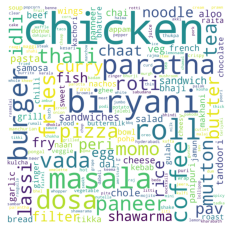

In [ ]:
dishes=''
for word in data['dish_liked']:
    words=word.split()
    # Converts each token into lowercase 
    for i in range(len(words)): 
        words[i] = words[i].lower() 
    dishes=dishes+ " ".join(words)+" "
wordcloud = WordCloud(max_font_size=None, background_color='white', collocations=False,stopwords = stopwords,width=1500, height=1500).generate(dishes)
plt.imshow(wordcloud)
plt.axis("off")

In [ ]:
def produce_wordcloud(rest):
    
    plt.figure(figsize=(20,30))
    for i,restaurant in enumerate(rest):
        plt.subplot(3,3,i+1)
        dishes=''
        data=df[df['rest_type']==restaurant]
        for word in data['dish_liked']:
            words=word.split()
            # Converts each token into lowercase 
            for i in range(len(words)): 
                words[i] = words[i].lower() 
            dishes=dishes+ " ".join(words)+" "
        wordcloud = WordCloud(max_font_size=None, background_color='white', collocations=False,stopwords = stopwords,width=1500, height=1500).generate(dishes)
        plt.imshow(wordcloud)
        plt.title(restaurant)
        plt.axis("off")

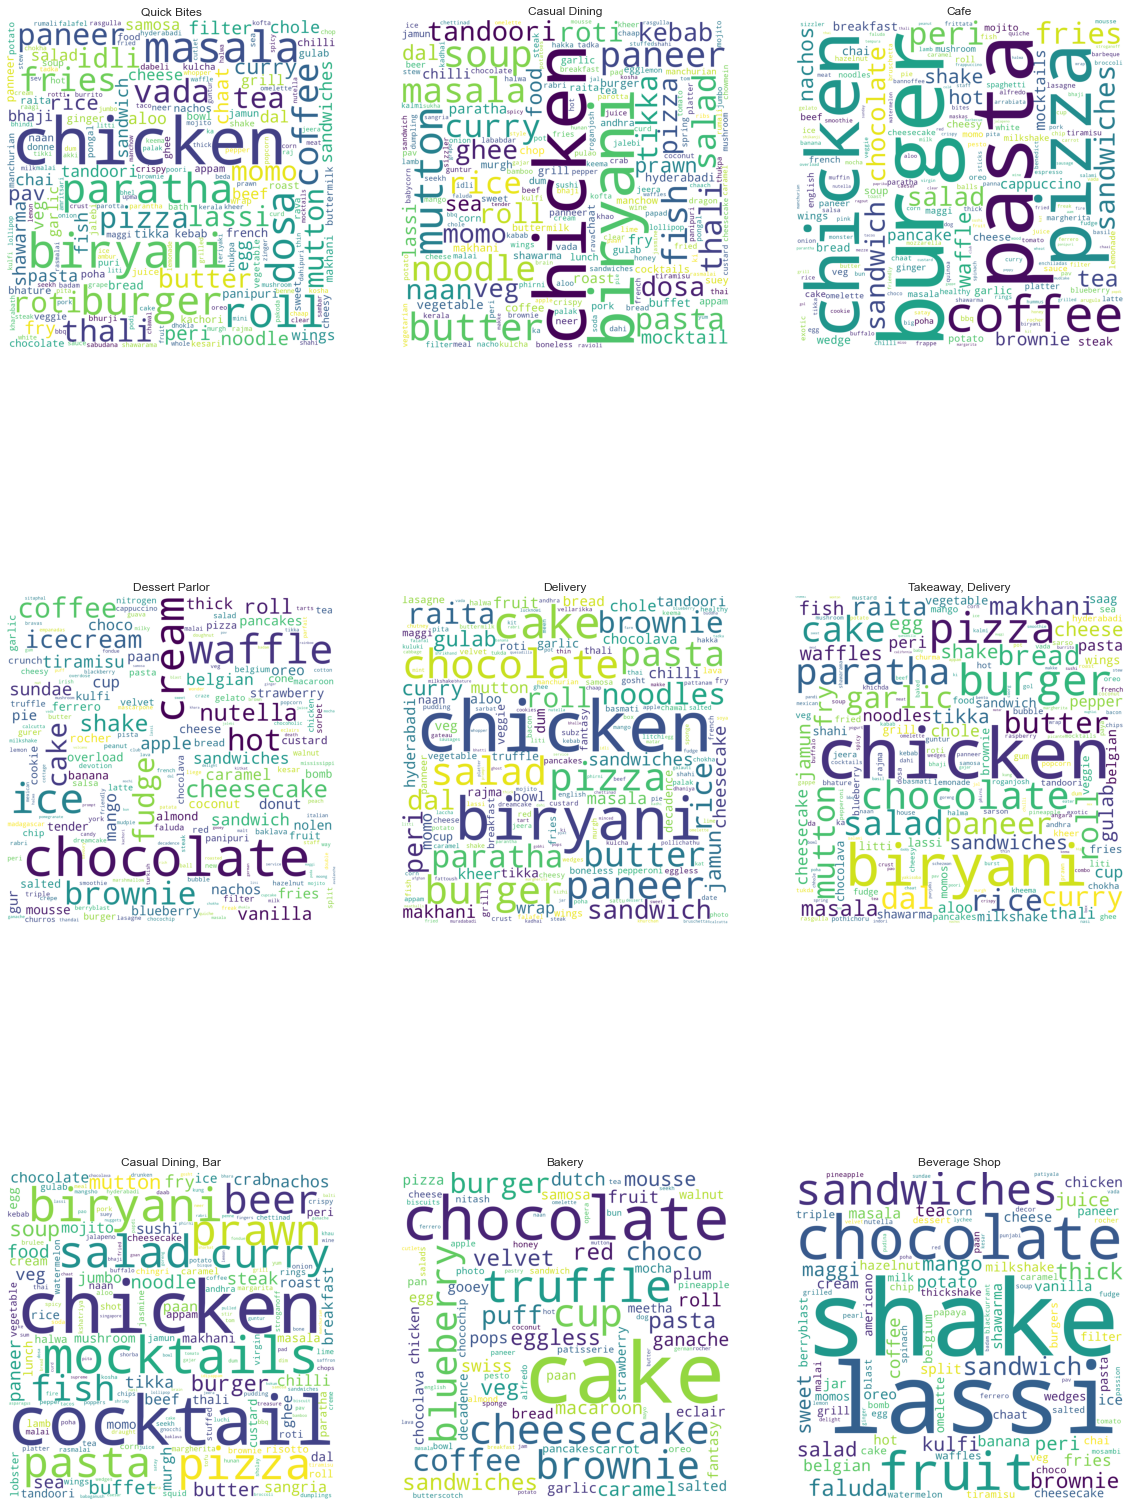

In [ ]:
stopwords = set(STOPWORDS) 
produce_wordcloud(rest)

##### analysing Reviews of Particular Restaurant

In [ ]:
df.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table  rate  votes                             phone  \
0          Yes        Yes   4.1    775    080 42297555\r\n+91 9743772233   
1          Yes         No   4.1    787                      080 41714161   
2          Yes         No   3.8    918                    +91 9663487993   
3           No         No   3.7     88                    +91 9620009302   
4           No         No   3.8    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines  approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                          800   
1     Chinese, North Indian, Thai                          800   
2          Cafe, Mexican, Italian                          800   
3      South Indian, North Indian                          300   
4        North Indian, Rajasthani                          600   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  \
0          Buffet    Banashankari   
1          Buffet    Banashankari   
2          Buffet    Banashankari   
3          Buffet    Banashankari   
4          Buffet    Banashankari   

                                   update_dish_liked  
0  [Pasta,  Lunch Buffet,  Masala Papad,  Paneer ...  
1  [Momos,  Lunch Buffet,  Chocolate Nirvana,  Th...  
2  [Churros,  Cannelloni,  Minestrone Soup,  Hot ...  
3                                      [Masala Dosa]  
4                             [Panipuri,  Gol Gappe]

In [ ]:
df['reviews_list'][0]

'[(\'Rated 4.0\', \'RATED\\n  A beautiful place to dine in.The interiors take you back to the Mughal era. The lightings are just perfect.We went there on the occasion of Christmas and so they had only limited items available. But the taste and service was not compromised at all.The only complaint is that the breads could have been better.Would surely like to come here again.\'), (\'Rated 4.0\', \'RATED\\n  I was here for dinner with my family on a weekday. The restaurant was completely empty. Ambience is good with some good old hindi music. Seating arrangement are good too. We ordered masala papad, panner and baby corn starters, lemon and corrionder soup, butter roti, olive and chilli paratha. Food was fresh and good, service is good too. Good for family hangout.\\nCheers\'), (\'Rated 2.0\', \'RATED\\n  Its a restaurant near to Banashankari BDA. Me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet. On inquiring they said this plac

In [ ]:
data=df['reviews_list'][0].lower()
data

'[(\'rated 4.0\', \'rated\\n  a beautiful place to dine in.the interiors take you back to the mughal era. the lightings are just perfect.we went there on the occasion of christmas and so they had only limited items available. but the taste and service was not compromised at all.the only complaint is that the breads could have been better.would surely like to come here again.\'), (\'rated 4.0\', \'rated\\n  i was here for dinner with my family on a weekday. the restaurant was completely empty. ambience is good with some good old hindi music. seating arrangement are good too. we ordered masala papad, panner and baby corn starters, lemon and corrionder soup, butter roti, olive and chilli paratha. food was fresh and good, service is good too. good for family hangout.\\ncheers\'), (\'rated 2.0\', \'rated\\n  its a restaurant near to banashankari bda. me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet. on inquiring they said this plac

In [ ]:
import re
data2=re.sub('[^a-zA-Z]', ' ',data)
data2

'   rated        rated n  a beautiful place to dine in the interiors take you back to the mughal era  the lightings are just perfect we went there on the occasion of christmas and so they had only limited items available  but the taste and service was not compromised at all the only complaint is that the breads could have been better would surely like to come here again       rated        rated n  i was here for dinner with my family on a weekday  the restaurant was completely empty  ambience is good with some good old hindi music  seating arrangement are good too  we ordered masala papad  panner and baby corn starters  lemon and corrionder soup  butter roti  olive and chilli paratha  food was fresh and good  service is good too  good for family hangout  ncheers      rated        rated n  its a restaurant near to banashankari bda  me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet  on inquiring they said this place is mostly vis

In [ ]:
data3=re.sub('rated', ' ',data2)
data3

'              n  a beautiful place to dine in the interiors take you back to the mughal era  the lightings are just perfect we went there on the occasion of christmas and so they had only limited items available  but the taste and service was not compromised at all the only complaint is that the breads could have been better would surely like to come here again                  n  i was here for dinner with my family on a weekday  the restaurant was completely empty  ambience is good with some good old hindi music  seating arrangement are good too  we ordered masala papad  panner and baby corn starters  lemon and corrionder soup  butter roti  olive and chilli paratha  food was fresh and good  service is good too  good for family hangout  ncheers                 n  its a restaurant near to banashankari bda  me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet  on inquiring they said this place is mostly visited by vegetarians  any

In [ ]:
data4=re.sub('x',' ',data3)
data4

'              n  a beautiful place to dine in the interiors take you back to the mughal era  the lightings are just perfect we went there on the occasion of christmas and so they had only limited items available  but the taste and service was not compromised at all the only complaint is that the breads could have been better would surely like to come here again                  n  i was here for dinner with my family on a weekday  the restaurant was completely empty  ambience is good with some good old hindi music  seating arrangement are good too  we ordered masala papad  panner and baby corn starters  lemon and corrionder soup  butter roti  olive and chilli paratha  food was fresh and good  service is good too  good for family hangout  ncheers                 n  its a restaurant near to banashankari bda  me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet  on inquiring they said this place is mostly visited by vegetarians  any

##### remove multiple spaces

In [ ]:
re.sub(' +',' ',data4)

' n a beautiful place to dine in the interiors take you back to the mughal era the lightings are just perfect we went there on the occasion of christmas and so they had only limited items available but the taste and service was not compromised at all the only complaint is that the breads could have been better would surely like to come here again n i was here for dinner with my family on a weekday the restaurant was completely empty ambience is good with some good old hindi music seating arrangement are good too we ordered masala papad panner and baby corn starters lemon and corrionder soup butter roti olive and chilli paratha food was fresh and good service is good too good for family hangout ncheers n its a restaurant near to banashankari bda me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet on inquiring they said this place is mostly visited by vegetarians anyways we ordered ala carte items which took ages to come food was o

#### analyse review of a particular restaurant

In [ ]:
dataset=df[df['rest_type']=='Quick Bites']

In [ ]:
type(dataset['reviews_list'][3])

str

In [ ]:
total_review=' '
for review in dataset['reviews_list']:
    review=review.lower()
    review=re.sub('[^a-zA-Z]', ' ',review)
    review=re.sub('rated', ' ',review)
    review=re.sub('x',' ',review)
    review=re.sub(' +',' ',review)
    total_review=total_review + str(review)
 

(-0.5, 799.5, 799.5, -0.5)

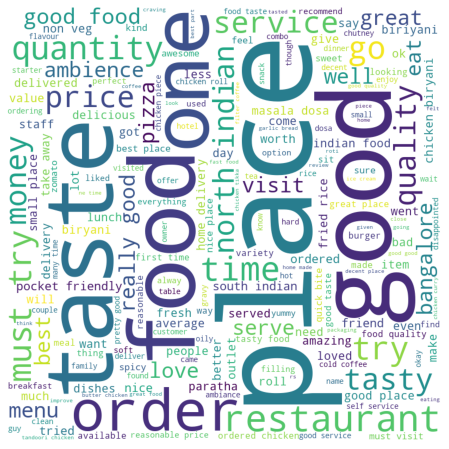

In [ ]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(total_review) 
# plot the WordCloud image                        
plt.figure(figsize = (8, 8)) 
plt.imshow(wordcloud) 
plt.axis("off") 

In [ ]:
def importance(restaurant):
    dataset=df[df['rest_type']==restaurant]
    total_review=' '
    for review in dataset['reviews_list']:
        review=review.lower()
        review=re.sub('[^a-zA-Z]', ' ',review)
        review=re.sub('rated', ' ',review)
        review=re.sub('x',' ',review)
        review=re.sub(' +',' ',review)
        total_review=total_review + str(review)
    wordcloud = WordCloud(width = 800, height = 800, 
            background_color ='white', 
            stopwords = set(STOPWORDS), 
            min_font_size = 10).generate(total_review) 
    # plot the WordCloud image                        
    plt.figure(figsize = (8, 8)) 
    plt.imshow(wordcloud) 
    plt.axis("off") 

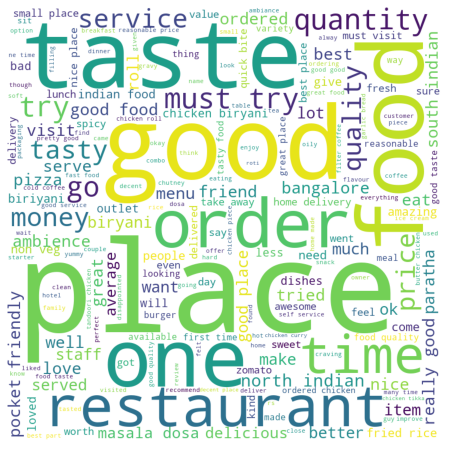

In [ ]:
importance('Quick Bites')